In [1]:
# Configuring the path of Kaggle.json file.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c playground-series-s5e6

playground-series-s5e6.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
# Extracting the compressed dataset.
from zipfile import ZipFile
data_path = 'playground-series-s5e6.zip'

with ZipFile(data_path,'r') as zip:
  zip.extractall()
  print('The data set has been extracted.')
  del zip

The data set has been extracted.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')


In [4]:
df = pd.read_csv('train.csv')
df.head()

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,4,35,58,43,Red,Paddy,37,2,16,DAP


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               750000 non-null  int64 
 1   Temparature      750000 non-null  int64 
 2   Humidity         750000 non-null  int64 
 3   Moisture         750000 non-null  int64 
 4   Soil Type        750000 non-null  object
 5   Crop Type        750000 non-null  object
 6   Nitrogen         750000 non-null  int64 
 7   Potassium        750000 non-null  int64 
 8   Phosphorous      750000 non-null  int64 
 9   Fertilizer Name  750000 non-null  object
dtypes: int64(7), object(3)
memory usage: 57.2+ MB


In [6]:
df.drop('id', axis=1, inplace=True)
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,31.503565,61.038912,45.184147,23.093808,9.478296,21.073227
std,4.025574,6.647695,11.794594,11.216125,5.765622,12.346831
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,55.000000,35.000000,13.000000,4.000000,10.000000
50%,32.000000,61.000000,45.000000,23.000000,9.000000,21.000000
75%,35.000000,67.000000,55.000000,33.000000,14.000000,32.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [7]:
numeric = df.describe().columns.tolist()
cat_cols = ["Soil Type", "Crop Type", "Fertilizer Name"]

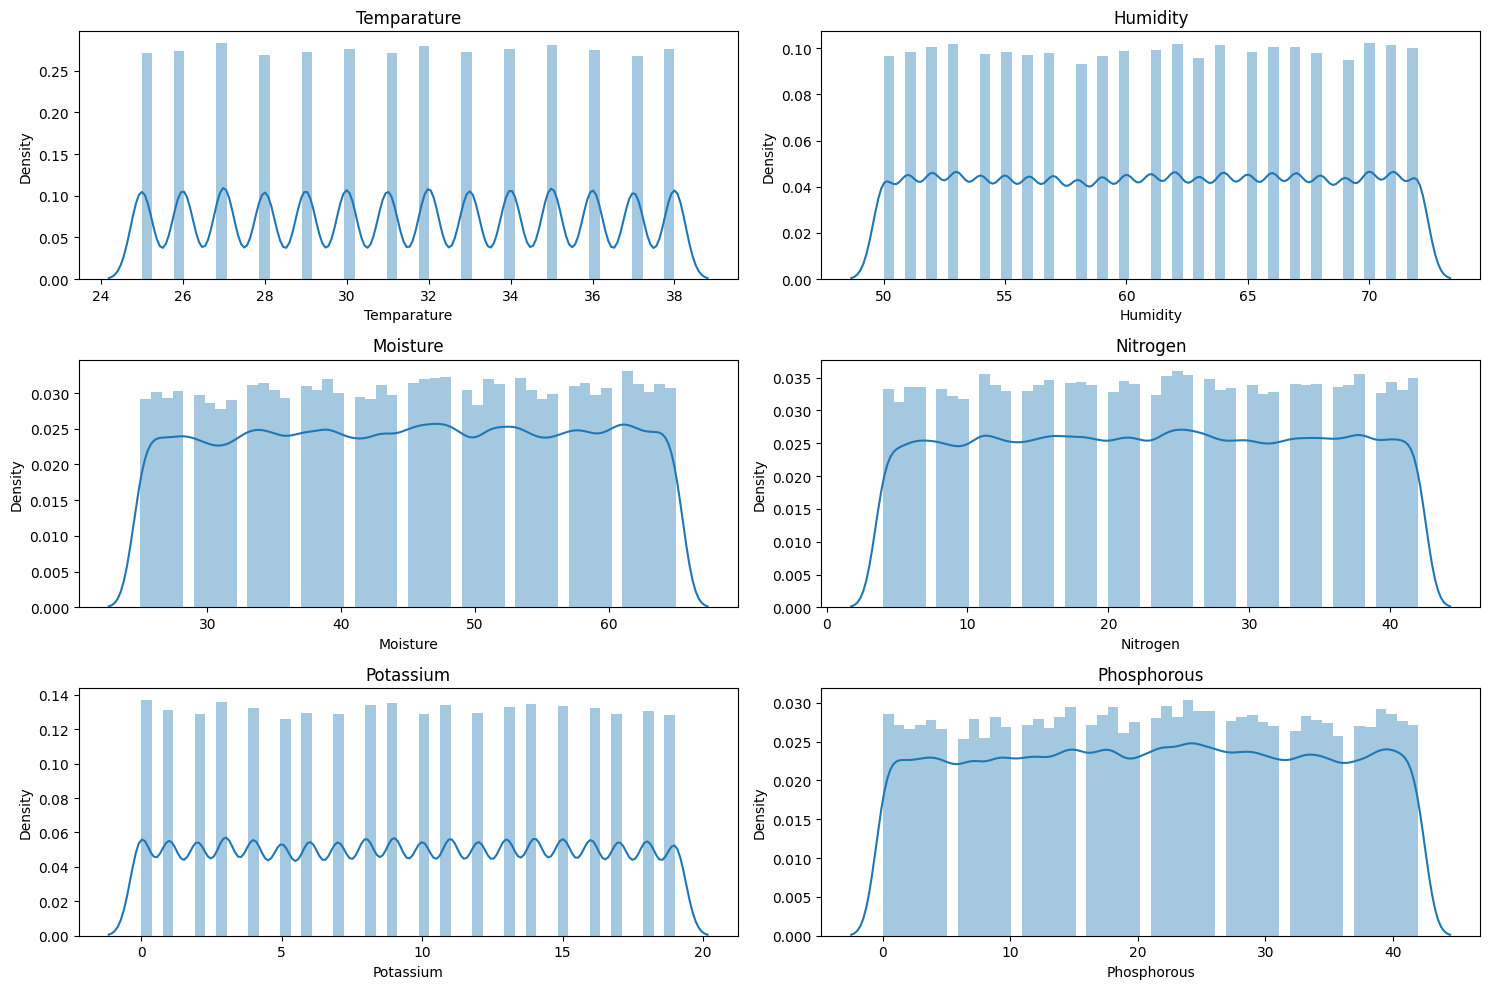

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

axes = axes.flatten()
for ax, col in zip(axes, numeric):
    sb.distplot(df[col], ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

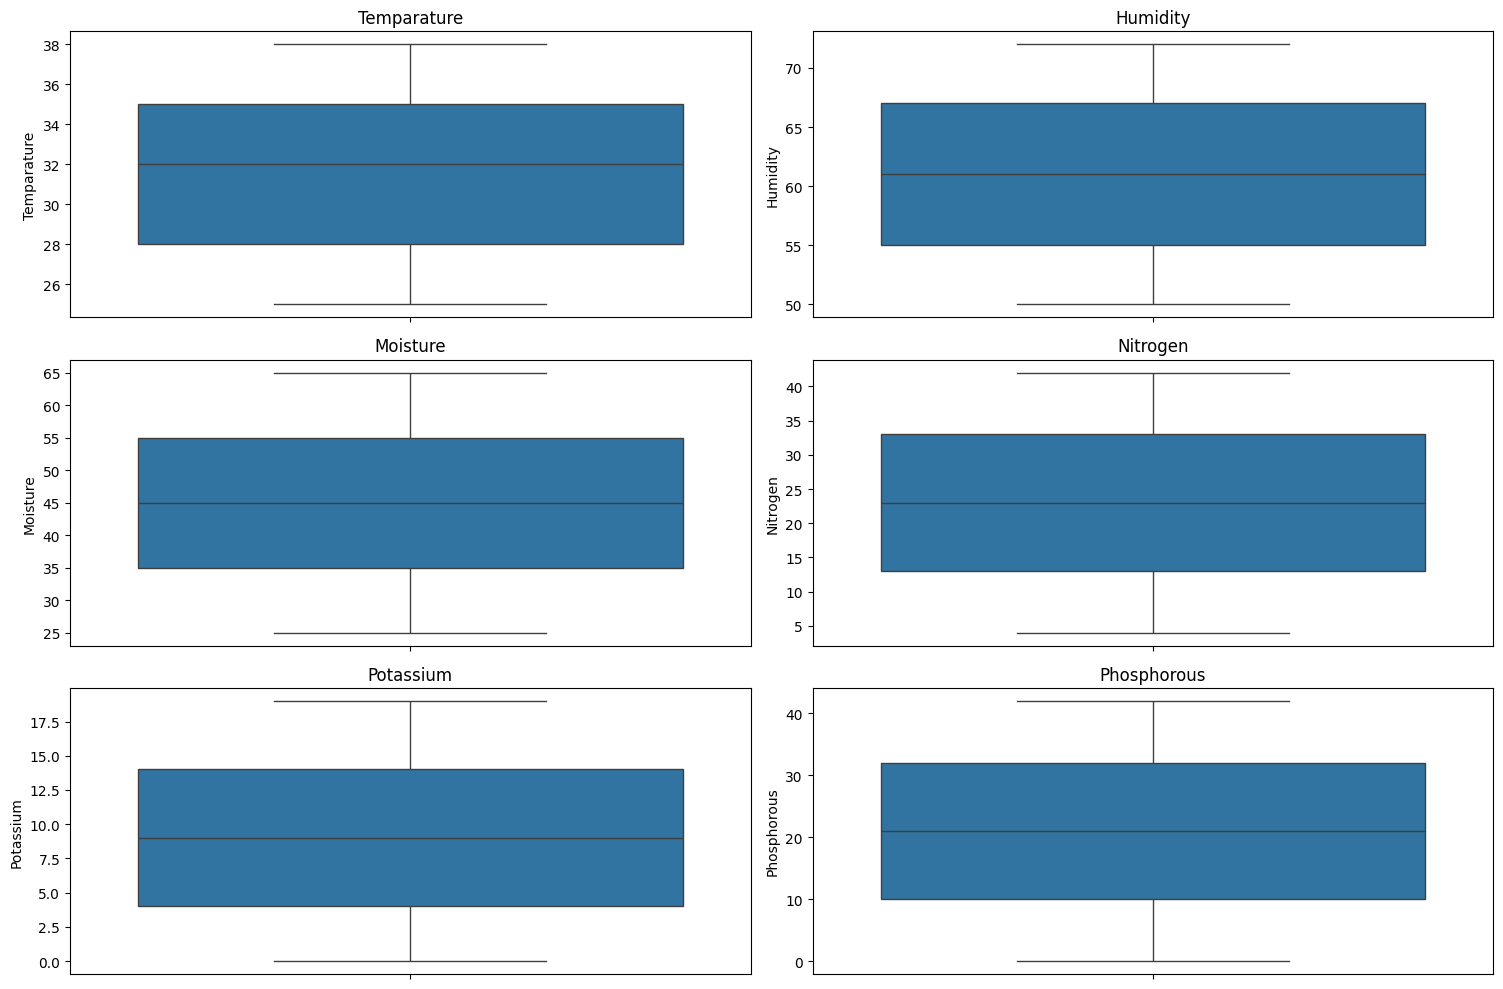

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

axes = axes.flatten()
for ax, col in zip(axes, numeric):
    sb.boxplot(df[col], ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

In [10]:
for col in cat_cols:
  print(df[col].value_counts())
  print()

Soil Type
Sandy     156710
Black     150956
Clayey    148382
Red       148102
Loamy     145850
Name: count, dtype: int64

Crop Type
Paddy          85754
Pulses         78180
Cotton         69171
Tobacco        68000
Wheat          66628
Millets        65291
Barley         65045
Sugarcane      64269
Oil seeds      64184
Maize          62569
Ground Nuts    60909
Name: count, dtype: int64

Fertilizer Name
14-35-14    114436
10-26-26    113887
17-17-17    112453
28-28       111158
20-20       110889
DAP          94860
Urea         92317
Name: count, dtype: int64



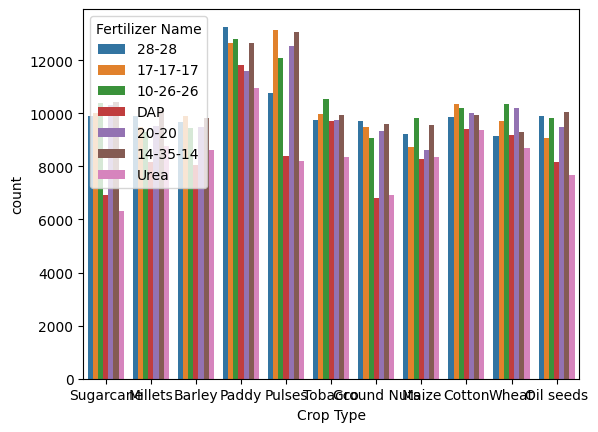

In [11]:
sb.countplot(data=df, x='Crop Type', hue='Fertilizer Name')
plt.show()

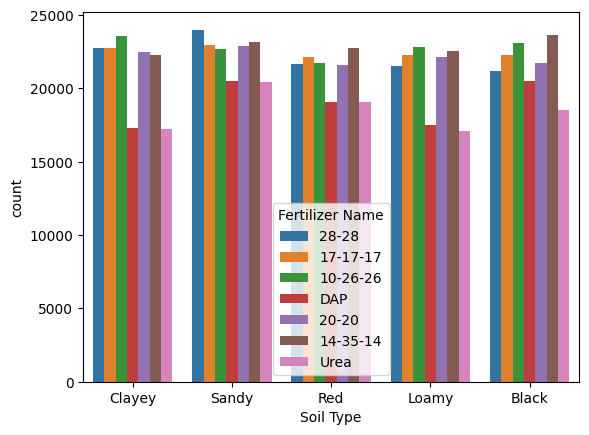

In [12]:
sb.countplot(data=df, x='Soil Type', hue='Fertilizer Name')
plt.show()

In [13]:
# One Hot Encoding
def one_hot_encode(df):
    cat_cols = ["Soil Type", "Crop Type"]
    for col in cat_cols:
      temp = pd.get_dummies(df[col]).astype('int')
      df = pd.concat([df, temp], axis=1)
    return df
df = one_hot_encode(df)

In [14]:
# Label Encoding Part
soil_dict = {}
for i, label in enumerate(df["Soil Type"].unique(), start=1):
    soil_dict[label] = i
soil_dict

crop_dict = {label:i for i, label in enumerate(df["Crop Type"].unique(), start=1)}
soil_dict, crop_dict

({'Clayey': 1, 'Sandy': 2, 'Red': 3, 'Loamy': 4, 'Black': 5},
 {'Sugarcane': 1,
  'Millets': 2,
  'Barley': 3,
  'Paddy': 4,
  'Pulses': 5,
  'Tobacco': 6,
  'Ground Nuts': 7,
  'Maize': 8,
  'Cotton': 9,
  'Wheat': 10,
  'Oil seeds': 11})

In [15]:
df['Soil Type'] =df["Soil Type"].map(soil_dict)
df['Crop Type'] =df["Crop Type"].map(crop_dict)
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Black,...,Cotton,Ground Nuts,Maize,Millets,Oil seeds,Paddy,Pulses,Sugarcane,Tobacco,Wheat
0,37,70,36,1,1,36,4,5,28-28,0,...,0,0,0,0,0,0,0,1,0,0
1,27,69,65,2,2,30,6,18,28-28,0,...,0,0,0,1,0,0,0,0,0,0
2,29,63,32,2,2,24,12,16,17-17-17,0,...,0,0,0,1,0,0,0,0,0,0
3,35,62,54,2,3,39,12,4,10-26-26,0,...,0,0,0,0,0,0,0,0,0,0
4,35,58,43,3,4,37,2,16,DAP,0,...,0,0,0,0,0,1,0,0,0,0


In [16]:
fert_dict = {label:i for i, label in enumerate(df["Fertilizer Name"].unique())}
df['Fertilizer Name'] =df["Fertilizer Name"].map(fert_dict)
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Black,...,Cotton,Ground Nuts,Maize,Millets,Oil seeds,Paddy,Pulses,Sugarcane,Tobacco,Wheat
0,37,70,36,1,1,36,4,5,0,0,...,0,0,0,0,0,0,0,1,0,0
1,27,69,65,2,2,30,6,18,0,0,...,0,0,0,1,0,0,0,0,0,0
2,29,63,32,2,2,24,12,16,1,0,...,0,0,0,1,0,0,0,0,0,0
3,35,62,54,2,3,39,12,4,2,0,...,0,0,0,0,0,0,0,0,0,0
4,35,58,43,3,4,37,2,16,3,0,...,0,0,0,0,0,1,0,0,0,0


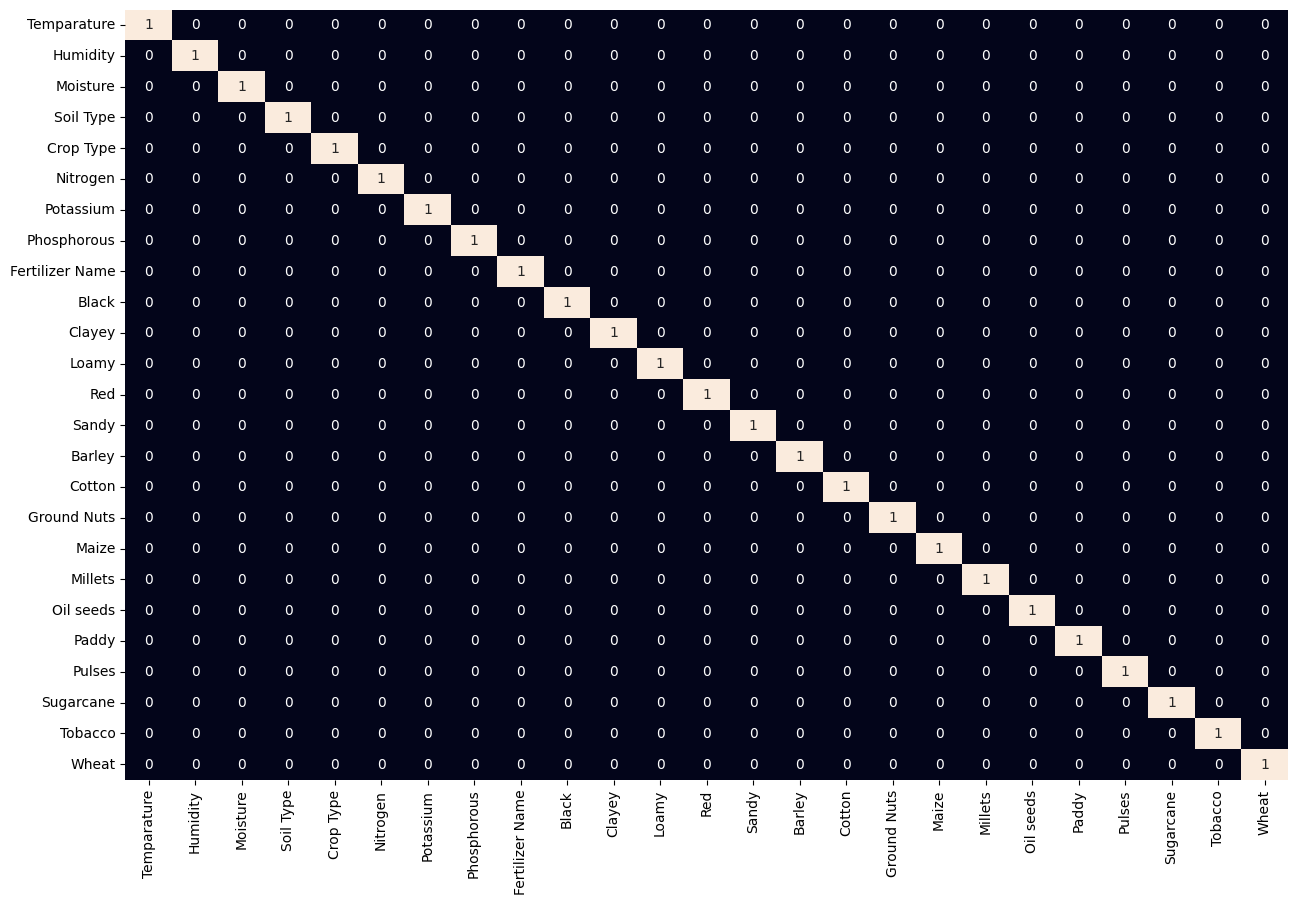

In [17]:
plt.figure(figsize=(15, 10))
sb.heatmap(df.corr()>0.8, cbar=False, annot=True)
plt.show()

In [18]:
features = df.drop('Fertilizer Name', axis=1)
target = df['Fertilizer Name']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(features, target,
                                                  test_size = 0.2,
                                                  random_state=10)

In [20]:
from sklearn.preprocessing import StandardScaler
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [21]:
def apk(actual, predicted, k=3):
    """Average precision at k for one sample."""
    if actual in predicted:
        return 1.0 / (predicted.index(actual) + 1)
    return 0.0

def mapk(y_true, y_pred_topk, k=3):
    """Mean average precision at k over all samples."""
    return np.mean([apk(a, p, k) for a, p in zip(y_true, y_pred_topk)])

In [22]:
from xgboost import XGBClassifier
model = XGBClassifier()

model.fit(X_train, Y_train)
y_train_pred = model.predict_proba(X_train)
y_val_pred = model.predict_proba(X_val)

In [23]:
y_train_pred[:5]

array([[0.14393675, 0.15318272, 0.13954295, 0.13475366, 0.16506681,
        0.1124267 , 0.1510904 ],
       [0.10533906, 0.14899299, 0.1299311 , 0.17333867, 0.19886796,
        0.15134645, 0.09218377],
       [0.15688106, 0.15925877, 0.13881968, 0.1325689 , 0.11365423,
        0.17101526, 0.12780212],
       [0.10520682, 0.11921359, 0.14992096, 0.12758936, 0.28230625,
        0.14099234, 0.07477069],
       [0.14500569, 0.16064134, 0.14007652, 0.10470103, 0.12058671,
        0.18677622, 0.14221247]], dtype=float32)

In [24]:
top3_indices_train = np.argsort(y_train_pred, axis=1)[:, -3:][:, ::-1]
top3_indices_val = np.argsort(y_val_pred, axis=1)[:, -3:][:, ::-1]

In [25]:
train_map = mapk(Y_train, top3_indices_train.tolist())
val_map = mapk(Y_val, top3_indices_val.tolist())

print('MAP@3 Value for Training Data is :', train_map)
print('MAP@3 Value for Validation Data is :', val_map)

MAP@3 Value for Training Data is : 0.4001822222222222
MAP@3 Value for Validation Data is : 0.33115999999999995


In [26]:
test = pd.read_csv('test.csv')
test.head()

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,750000,31,70,52,Sandy,Wheat,34,11,24
1,750001,27,62,45,Red,Sugarcane,30,14,15
2,750002,28,72,28,Clayey,Ground Nuts,14,15,4
3,750003,37,53,57,Black,Ground Nuts,18,17,36
4,750004,31,55,32,Red,Pulses,13,19,14


In [27]:
test.drop('id', axis=1, inplace=True)
test.shape

(250000, 8)

In [28]:
test = one_hot_encode(test)
test.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Black,Clayey,...,Cotton,Ground Nuts,Maize,Millets,Oil seeds,Paddy,Pulses,Sugarcane,Tobacco,Wheat
0,31,70,52,Sandy,Wheat,34,11,24,0,0,...,0,0,0,0,0,0,0,0,0,1
1,27,62,45,Red,Sugarcane,30,14,15,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,72,28,Clayey,Ground Nuts,14,15,4,0,1,...,0,1,0,0,0,0,0,0,0,0
3,37,53,57,Black,Ground Nuts,18,17,36,1,0,...,0,1,0,0,0,0,0,0,0,0
4,31,55,32,Red,Pulses,13,19,14,0,0,...,0,0,0,0,0,0,1,0,0,0


In [30]:
#Install and train XGBoost
!pip install xgboost
import xgboost as xgb
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=7,
    n_estimators=500,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='mlogloss'
)
xgb_model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_class=7, num_parallel_tree=None, ...)

In [31]:
test['Soil Type'] =test["Soil Type"].map(soil_dict)
test['Crop Type'] =test["Crop Type"].map(crop_dict)

In [33]:
#Calculate MAP@3 on validation set
from sklearn.model_selection import train_test_split

# Split data
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, Y_train, test_size=0.2, random_state=42
)

# Train both models on split
model.fit(X_train_split, y_train_split)
xgb_model.fit(X_train_split, y_train_split)

# Predict probabilities
preds_rf_val = model.predict_proba(scaler.transform(X_val_split))
preds_xgb_val = xgb_model.predict_proba(scaler.transform(X_val_split))
preds_avg_val = (preds_rf_val + preds_xgb_val) / 2

# Define the reverse dictionary for fertilizer names
fert_dict_rev = {val:key for key, val in fert_dict.items()}

# Get top 3 predictions
top3_indices_val = np.argsort(preds_avg_val, axis=1)[:, -3:][:, ::-1]
top3_pred_labels_val = [[fert_dict_rev[val] for val in row] for row in top3_indices_val]

# Convert y_val_split to names
y_val_names = [fert_dict_rev[label] for label in y_val_split]

# Define MAP@3 function
def map_at_3(y_true, y_pred):
    map_score = 0.0
    for i in range(len(y_true)):
        true_label = y_true[i]
        pred_labels = y_pred[i]
        score = 0.0
        for k in range(3):
            if pred_labels[k] == true_label:
                score += 1.0 / (k + 1)
                break
        map_score += score
    return map_score / len(y_true)

# Calculate and print MAP@3
map_score = map_at_3(y_val_names, top3_pred_labels_val)
print(f"MAP@3 on validation set: {map_score:.4f}")

MAP@3 on validation set: 0.2747


In [34]:
test.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Black,Clayey,...,Cotton,Ground Nuts,Maize,Millets,Oil seeds,Paddy,Pulses,Sugarcane,Tobacco,Wheat
0,31,70,52,2,10,34,11,24,0,0,...,0,0,0,0,0,0,0,0,0,1
1,27,62,45,3,1,30,14,15,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,72,28,1,7,14,15,4,0,1,...,0,1,0,0,0,0,0,0,0,0
3,37,53,57,5,7,18,17,36,1,0,...,0,1,0,0,0,0,0,0,0,0
4,31,55,32,3,5,13,19,14,0,0,...,0,0,0,0,0,0,1,0,0,0


In [36]:
from sklearn.model_selection import cross_val_score

# Cross-validation for XGBoost
cv_scores = cross_val_score(xgb_model, X_train, Y_train, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

Cross-validation accuracy: 0.2006 (+/- 0.0012)


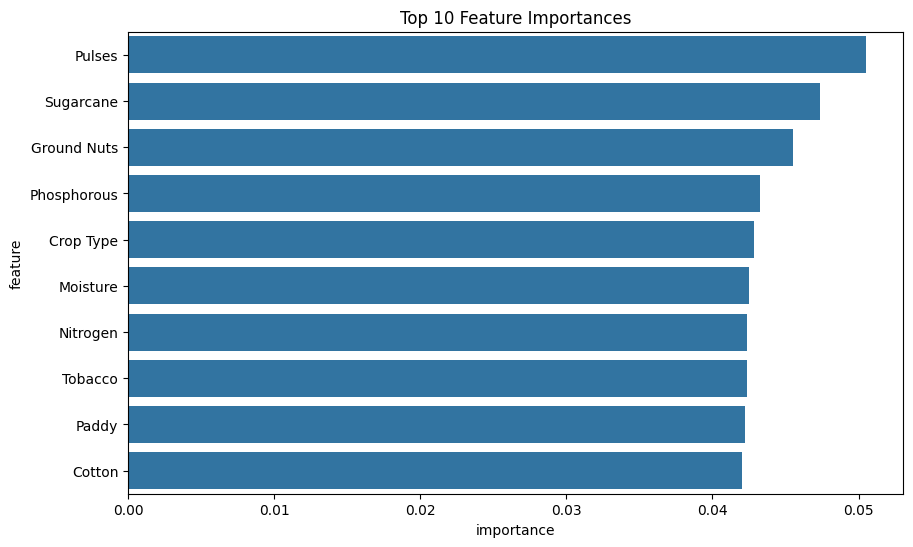

In [38]:
# Plot feature importances
importances = xgb_model.feature_importances_
feature_names = features.columns
feat_imp = pd.DataFrame({'feature': feature_names, 'importance': importances})
feat_imp = feat_imp.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sb.barplot(x='importance', y='feature', data=feat_imp.head(10))
plt.title('Top 10 Feature Importances')
plt.show()

In [41]:
if not isinstance(features, pd.DataFrame):
    print("Warning: features is not a DataFrame. Converting to DataFrame.")
    features = pd.DataFrame(features, columns=df.drop('Fertilizer Name', axis=1).columns)

features['Nitrogen_Phosphorous'] = features['Nitrogen'] * features['Phosphorous']


if not isinstance(test, pd.DataFrame):
     print("Warning: test is not a DataFrame. Cannot add 'Nitrogen_Phosphorous' directly.")

test['Nitrogen_Phosphorous'] = test['Nitrogen'] * test['Phosphorous']


# Split data again after adding the new feature
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(features, target,
                                                  test_size = 0.2,
                                                  random_state=10)

# Normalizing the features after adding the new feature
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


from xgboost import XGBClassifier
xgb_model = XGBClassifier(
    objective='multi:softprob',
    num_class=7,
    n_estimators=500,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='mlogloss'
)
xgb_model.fit(X_train_scaled, Y_train)

test_scaled = scaler.transform(test)

In [42]:
#Align test columns with training columns
test = test.reindex(columns=features.columns, fill_value=0)
test.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Black,Clayey,...,Ground Nuts,Maize,Millets,Oil seeds,Paddy,Pulses,Sugarcane,Tobacco,Wheat,Nitrogen_Phosphorous
0,31,70,52,2,10,34,11,24,0,0,...,0,0,0,0,0,0,0,0,1,816
1,27,62,45,3,1,30,14,15,0,0,...,0,0,0,0,0,0,1,0,0,450
2,28,72,28,1,7,14,15,4,0,1,...,1,0,0,0,0,0,0,0,0,56
3,37,53,57,5,7,18,17,36,1,0,...,1,0,0,0,0,0,0,0,0,648
4,31,55,32,3,5,13,19,14,0,0,...,0,0,0,0,0,1,0,0,0,182


In [48]:

missing_cols = set(X_train.columns) - set(test.columns)
for col in missing_cols:
    test[col] = 0
test = test[X_train.columns]

In [49]:
from sklearn.calibration import CalibratedClassifierCV

# Calibrate XGBoost model
calibrated_xgb = CalibratedClassifierCV(xgb_model, method='isotonic', cv=5)
calibrated_xgb.fit(X_train_scaled, Y_train)


preds_calibrated = calibrated_xgb.predict_proba(scaler.transform(test))
top3_indices_test = np.argsort(preds_calibrated, axis=1)[:, -3:][:, ::-1]
top3_indices_test[:5]

fert_dict_rev = {val:key for key, val in fert_dict.items()}
fert_dict_rev


{0: '28-28',
 1: '17-17-17',
 2: '10-26-26',
 3: 'DAP',
 4: '20-20',
 5: '14-35-14',
 6: 'Urea'}

In [50]:

top3_pred_labels = [[fert_dict_rev[val] for val in row] for row in top3_indices_test]
top3_pred_labels[:5]

[['DAP', '28-28', '10-26-26'],
 ['17-17-17', '20-20', '10-26-26'],
 ['20-20', '10-26-26', '28-28'],
 ['14-35-14', '17-17-17', 'DAP'],
 ['20-20', '28-28', '10-26-26']]

In [51]:
final_pred = [' '.join(row) for row in top3_pred_labels]
final_pred[:5]

['DAP 28-28 10-26-26',
 '17-17-17 20-20 10-26-26',
 '20-20 10-26-26 28-28',
 '14-35-14 17-17-17 DAP',
 '20-20 28-28 10-26-26']

In [53]:
# Load the sample submission file
ss = pd.read_csv('sample_submission.csv')

ss['Fertilizer Name'] = final_pred
ss.to_csv('Submission_calibrated.csv', index=False)

In [54]:
ss.to_csv('Submission.csv', index=False)

In [55]:
!kaggle competitions submit -c playground-series-s5e6 -f Submission.csv -m "Calibrated XGBoost Submission"

100% 6.89M/6.89M [00:00<00:00, 26.2MB/s]
Successfully submitted to Predicting Optimal Fertilizers